In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'train.csv'
df = pd.read_csv(path)

path = 'test.csv'
df_test = pd.read_csv(path)
df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Survival Bar Chart

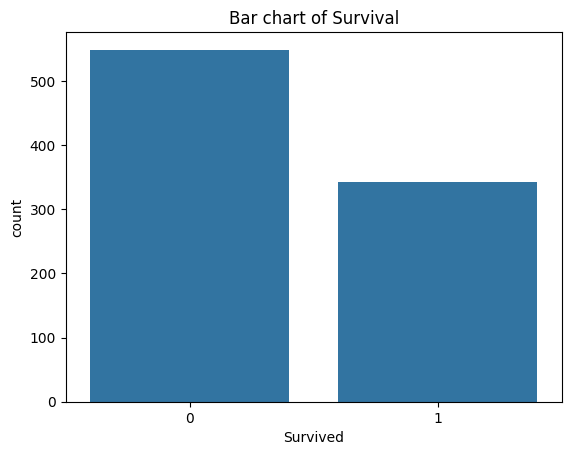

In [5]:
sns.countplot(df, x = 'Survived')
plt.title("Bar chart of Survival")
plt.show()

Class Bar Chart

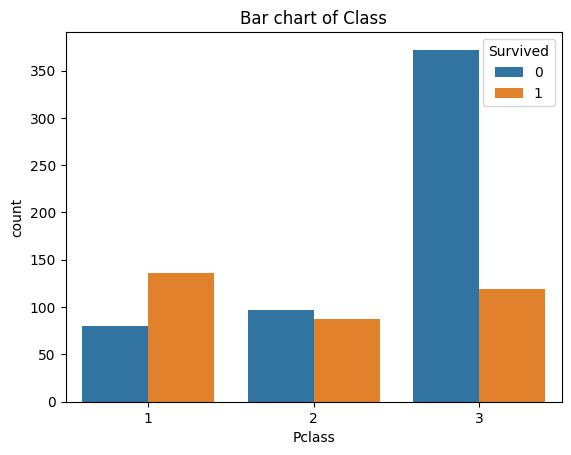

In [6]:
sns.countplot(df, x = 'Pclass', hue = 'Survived')
plt.title("Bar chart of Class")
plt.show()

Sex Bar Chart

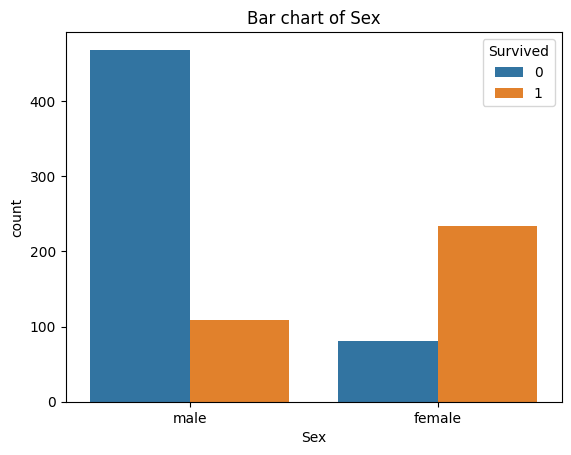

In [7]:
sns.countplot(df, x = 'Sex', hue = 'Survived')
plt.title("Bar chart of Sex")
plt.show()

Age Histogram

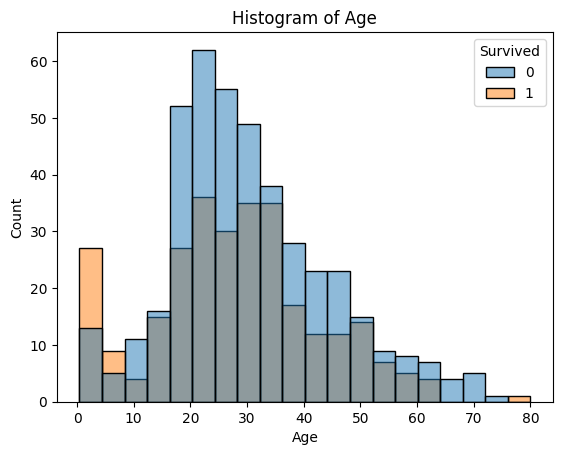

In [8]:
sns.histplot(df, x = 'Age', hue = 'Survived')
plt.title("Histogram of Age")
plt.show()

Sibling Spouse Bar Chart

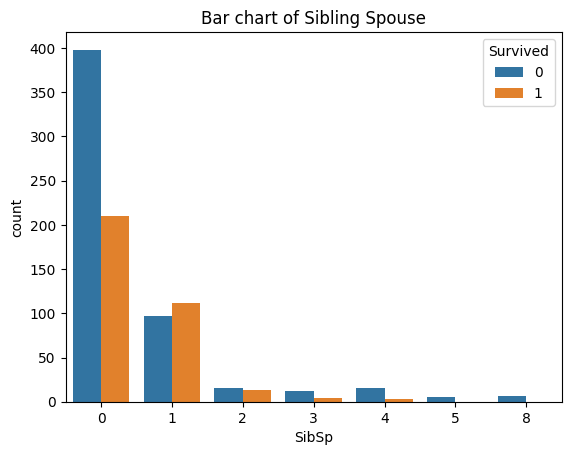

In [9]:
sns.countplot(df, x = 'SibSp', hue = 'Survived')
plt.title("Bar chart of Sibling Spouse")
plt.show()

Parents Child Bar Chart

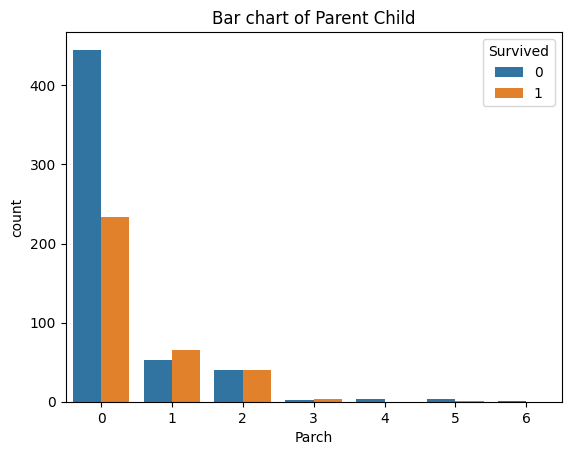

In [10]:
sns.countplot(df, x = 'Parch', hue = 'Survived')
plt.title("Bar chart of Parent Child")
plt.show()

Fares Histogram

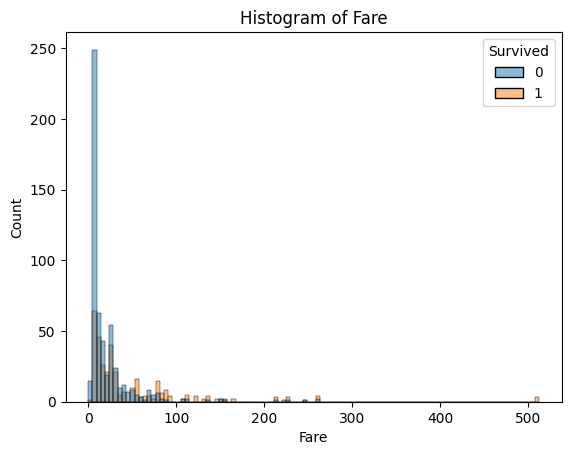

In [11]:
sns.histplot(df, x ="Fare", hue="Survived")
plt.title("Histogram of Fare")
plt.show()

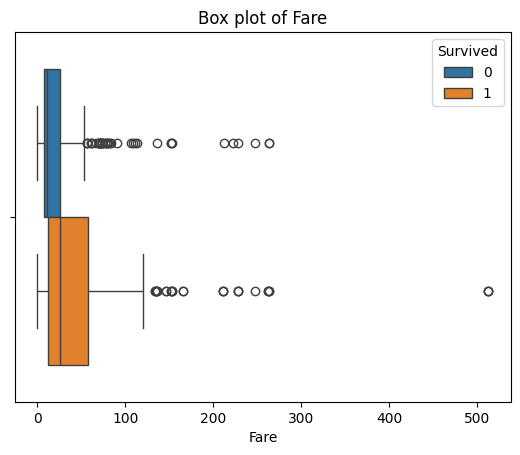

In [12]:
sns.boxplot(df, x = 'Fare', hue = 'Survived')
plt.title("Box plot of Fare")
plt.show()

In [13]:
#Remove rows with max fare
df = df[-(df.Fare == df.Fare.max())]
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


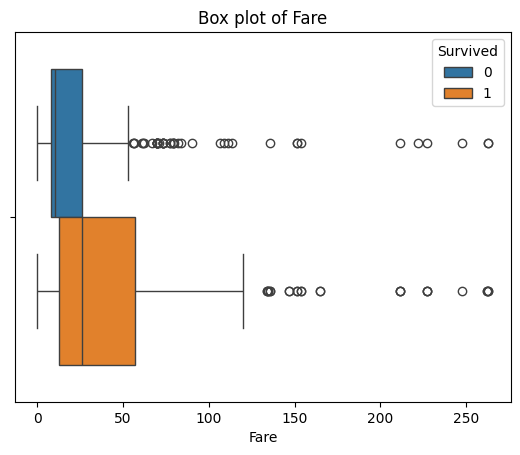

In [14]:
sns.boxplot(df, x = 'Fare', hue = 'Survived')
plt.title("Box plot of Fare")
plt.show()

In [15]:
df.Fare.skew()

np.float64(3.1878768213280524)

<Axes: xlabel='Embarked', ylabel='count'>

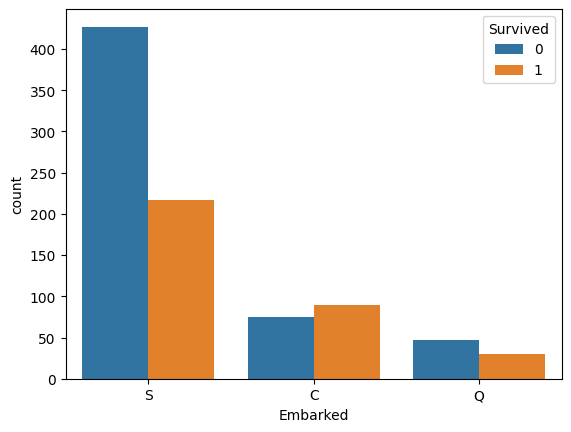

In [16]:
sns.countplot(df, x = "Embarked", hue = "Survived")

Gender One Hot Encoder

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded_sex = encoder.fit_transform(df[['Sex']]).toarray()
encoded_sex

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], shape=(888, 2))

In [18]:
df[["Female", 'Male']] = encoded_sex
df

C:\Users\Owi Sze Jay\AppData\Local\Temp\ipykernel_31876\3205094174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Female", 'Male']] = encoded_sex
C:\Users\Owi Sze Jay\AppData\Local\Temp\ipykernel_31876\3205094174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Female", 'Male']] = encoded_sex


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female,Male
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,1.0,0.0
888,0,3,female,NaN,1,2,23.4500,S,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,0.0,1.0


In [19]:
df = df.drop(["Sex", "Female"], axis = 1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male
0,0,3,22.0,1,0,7.2500,S,1.0
1,1,1,38.0,1,0,71.2833,C,0.0
2,1,3,26.0,0,0,7.9250,S,0.0
3,1,1,35.0,1,0,53.1000,S,0.0
4,0,3,35.0,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1.0
887,1,1,19.0,0,0,30.0000,S,0.0
888,0,3,NaN,1,2,23.4500,S,0.0
889,1,1,26.0,0,0,30.0000,C,1.0


One Hot Encoding for Embarked

In [20]:
#Fill NaN first
print(df["Embarked"].mode())
df["Embarked"] = df["Embarked"].fillna('S')


encoder.fit(df[["Embarked"]])
encoded_embarked = encoder.transform(df[["Embarked"]]).toarray()
encoded_embarked

0    S
Name: Embarked, dtype: object


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(888, 3))

In [21]:
#use pd.get_dummies

encoded_embarked = pd.get_dummies(df['Embarked'], dtype=int, drop_first=True, prefix="Embarked")
df = pd.concat([df,encoded_embarked],axis = 1)

df = df.drop(["Embarked"],axis =1)

In [22]:
df.isna().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Male            0
Embarked_Q      0
Embarked_S      0
dtype: int64

Fill NaN of Age

In [23]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
age_imputed = imputer.fit_transform(df[['Age']])
df['Age'] = age_imputed
df
age_imputed = imputer.fit_transform(df_test[['Age']])
df_test['Age'] = age_imputed
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [24]:
#Check NaN
df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Male          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [25]:
df['Fare'].skew()

np.float64(3.1878768213280524)

Normalize Fare 

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_fare = scaler.fit_transform(df[['Fare']])
scaled_fare = pd.DataFrame(scaled_fare)
scaled_fare.skew()

0    3.187877
dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[['Fare']])
scaled_fare = pd.DataFrame(scaled_fare)
scaled_fare.skew()

0    3.187877
dtype: float64

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(df[['Fare']])
scaled_fare = pd.DataFrame(scaled_fare)
scaled_fare.skew()

0    3.187877
dtype: float64

In [29]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1.0,0,1
1,1,1,38.000000,1,0,71.2833,0.0,0,0
2,1,3,26.000000,0,0,7.9250,0.0,0,1
3,1,1,35.000000,1,0,53.1000,0.0,0,1
4,0,3,35.000000,0,0,8.0500,1.0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1.0,0,1
887,1,1,19.000000,0,0,30.0000,0.0,0,1
888,0,3,29.675345,1,2,23.4500,0.0,0,1
889,1,1,26.000000,0,0,30.0000,1.0,0,0


Train Test Split

In [30]:
Male = df.Male
df = df.drop('Male',axis = 1)
df = pd.concat([df,Male],axis = 1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Male
0,0,3,22.000000,1,0,7.2500,0,1,1.0
1,1,1,38.000000,1,0,71.2833,0,0,0.0
2,1,3,26.000000,0,0,7.9250,0,1,0.0
3,1,1,35.000000,1,0,53.1000,0,1,0.0
4,0,3,35.000000,0,0,8.0500,0,1,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,1.0
887,1,1,19.000000,0,0,30.0000,0,1,0.0
888,0,3,29.675345,1,2,23.4500,0,1,0.0
889,1,1,26.000000,0,0,30.0000,0,0,1.0


In [31]:
from sklearn.model_selection import train_test_split
df.columns = [x.title() for x in df.columns]
print(df.columns)

X = df.drop("Survived",axis = 1)
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 87)


Index(['Survived', 'Pclass', 'Age', 'Sibsp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Male'],
      dtype='object')


Fit Logisitic Regression with Hypertuning

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np



logreg = LogisticRegression()

In [33]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       103
           1       0.78      0.67      0.72        75

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



C:\Users\Owi Sze Jay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Preprocess Test Set Data

In [34]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [35]:
PassengerId = df_test.PassengerId
df_test = df_test.drop(['Name','PassengerId','Ticket','Cabin'],axis = 1)

In [36]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [37]:
age_imputed = imputer.fit_transform(df_test[['Age']])
df_test['Age'] = age_imputed
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [38]:
#use pd.get_dummies

encoded_embarked = pd.get_dummies(df_test['Embarked'], dtype=int, drop_first=True, prefix="Embarked")
df_test = pd.concat([df_test,encoded_embarked],axis = 1)

df_test = df_test.drop(["Embarked"],axis =1)

In [39]:
#use pd.get_dummies

encoded_sex = pd.get_dummies(df_test['Sex'], dtype=int, drop_first=True)
df_test = pd.concat([df_test,encoded_sex],axis = 1)

df_test = df_test.drop(["Sex"],axis =1)
df_test

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,male
0,3,34.50000,0,0,7.8292,1,0,1
1,3,47.00000,1,0,7.0000,0,1,0
2,2,62.00000,0,0,9.6875,1,0,1
3,3,27.00000,0,0,8.6625,0,1,1
4,3,22.00000,1,1,12.2875,0,1,0
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,0,1,1
416,3,30.27259,0,0,8.0500,0,1,1


In [40]:
df_test.columns = [x.title() for x in df_test.columns]
df_test.columns


Index(['Pclass', 'Age', 'Sibsp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Male'],
      dtype='object')

In [41]:
df_test.Fare = df_test.Fare.fillna(df.Fare.median())
df_test

,Pclass,Age,Sibsp,Parch,Fare,Embarked_Q,Embarked_S,Male
0,3,34.50000,0,0,7.8292,1,0,1
1,3,47.00000,1,0,7.0000,0,1,0
2,2,62.00000,0,0,9.6875,1,0,1
3,3,27.00000,0,0,8.6625,0,1,1
4,3,22.00000,1,1,12.2875,0,1,0
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,0,1,1
416,3,30.27259,0,0,8.0500,0,1,1


In [42]:
print(df.columns)
print(df_test.columns)

Index(['Survived', 'Pclass', 'Age', 'Sibsp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Male'],
      dtype='object')
Index(['Pclass', 'Age', 'Sibsp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Male'],
      dtype='object')


In [43]:
df_test_pred = logreg.predict(df_test)
df_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Export Prediction to csv

In [44]:
data = {'PassengerId': PassengerId,
        'Survived' : df_test_pred}
data

results = pd.DataFrame(data)
results
results.to_csv('titanic_prediction_v10_logreg.csv', index= False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


train_scores = []
test_scores = []
n_trees = []

for n_tree in range(1,101,1):
    rf_model = RandomForestClassifier(n_estimators=n_tree, max_depth= 10, min_samples_leaf= 2 ,min_samples_split= 5, random_state=87)
    rf_model.fit(X_train,y_train)
    n_trees.append(n_tree)
    train_scores.append(rf_model.score(X_train,y_train))
    test_scores.append(rf_model.score(X_test,y_test))

test_scores


In [82]:
rf_accuracy = pd.DataFrame({"n_tree":n_trees, "train_score":train_scores})
rf_accuracy

,n_tree,train_score
0,1,0.747191
1,2,0.769663
2,3,0.786517
3,4,0.780899
4,5,0.797753
...,...,...
95,96,0.786517
96,97,0.786517
97,98,0.786517
98,99,0.786517


In [83]:
rf_accuracy[rf_accuracy.train_score == max(rf_accuracy.train_score)]

,n_tree,train_score
8,9,0.803371
10,11,0.803371


In [84]:
rf_accuracy = pd.melt(rf_accuracy,["n_tree"])
rf_accuracy

,n_tree,variable,value
0,1,train_score,0.747191
1,2,train_score,0.769663
2,3,train_score,0.786517
3,4,train_score,0.780899
4,5,train_score,0.797753
...,...,...,...
95,96,train_score,0.786517
96,97,train_score,0.786517
97,98,train_score,0.786517
98,99,train_score,0.786517


<Axes: xlabel='n_tree', ylabel='value'>

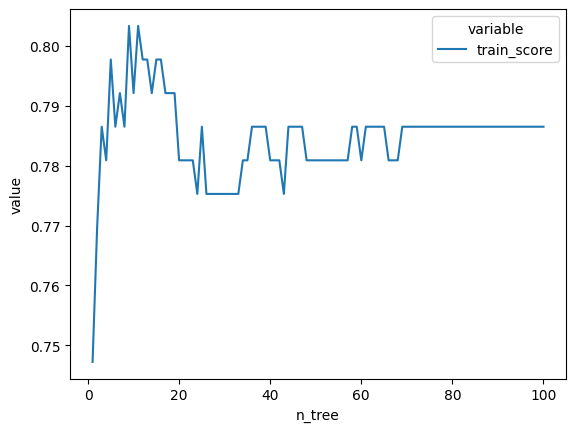

In [87]:
sns.lineplot(rf_accuracy, x = 'n_tree', y='value',hue='variable')

In [90]:
from sklearn.metrics import roc_curve, auc

rf_model = RandomForestClassifier(n_estimators=9, max_depth= 10, min_samples_leaf= 2 ,min_samples_split= 5, random_state=87)
rf_model.fit(X_train,y_train)

y_pred_probability = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, y_pred_probability)
roc_auc = auc(fpr,tpr)

df_roc = pd.DataFrame({"False Positive Rate":fpr, "True Positive Rate":tpr})
df_roc

,False Positive Rate,True Positive Rate
0,0.000000,0.000000
1,0.000000,0.053333
2,0.000000,0.080000
3,0.000000,0.106667
4,0.000000,0.146667
...,...,...
65,0.902913,0.973333
66,0.922330,0.973333
67,0.980583,0.986667
68,0.980583,1.000000


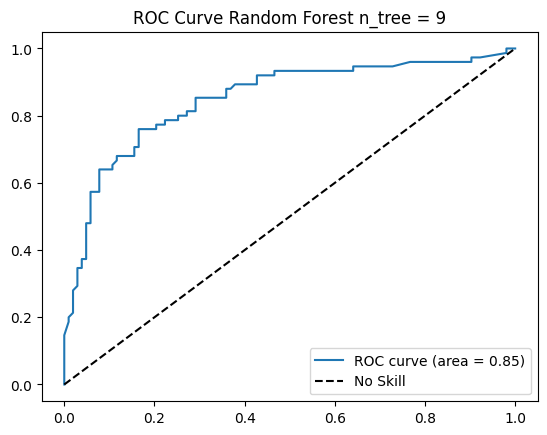

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_roc['False Positive Rate'],df_roc['True Positive Rate'],label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],[0, 1], 'k--' ,label = "No Skill")
plt.title("ROC Curve Random Forest n_tree = 9")
plt.legend()
plt.show()
